Los Bosques Aleatorios es un algoritmo de Machine Learning flexible y fácil de usar que produce, incluso sin ajuste de parámetros, un gran resultado la mayor parte del tiempo. También es uno de los algoritmos más utilizados, debido a su simplicidad y al hecho de que se puede usar tanto para tareas de clasificación como de regresión.

Los Bosques Aleatorios es un algoritmo de aprendizaje supervisado que, como ya se puede ver en su nombre, crea un bosque y lo hace de alguna manera aleatorio. Para decirlo en palabras simples: el Bosque Aleatorio crea múltiples árboles de decisión y los combina para obtener una predicción más precisa y estable. En general, mientras más árboles en el bosque se vea, más robusto es el bosque.

## Librerías 

In [1]:
#Bibliotecas
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Datos

In [2]:
df = pd.read_csv("avanceR.csv")   

In [3]:
df

,Unnamed: 0,userID,avance_nivel_grado,avance_nivel,Nivel de Dominio,Momento,AVANCE,email,NOMBRE_COMPLETO,CURP,...,F,G,H,I,J,total_items_relaciones,Sesiones_en_el aula_de_medios,Horas_de_capacitación_individual,Horas_de_capacitación_grupal,Total_horas
0,0,4062.0,Avance,3,3. Integrador,pre,AVANCE,letyprza@gmail.com,LETICIA BEATRIZ PEREZ AVILES,PEAL931219MYNRVT02,...,4,2,7,6,0,78,2,2,29,33
1,1,4064.0,Avance,1,2. Explorador,pre,AVANCE,guilleglezc@hotmail.com,GUILLERMINA GONZALEZ CERVANTES,GOCG780815MYNNRL01,...,2,1,3,4,0,45,0,0,19,19
2,2,4078.0,Avance,1,2. Explorador,pre,AVANCE,sky_yazmin@hotmail.com,VIOLETA YAZMÍN CETINA FUENTES,CEFV760415MYNTNL07,...,6,3,6,4,0,68,0,0,27,27
3,3,4082.0,Avance,2,3. Integrador,pre,AVANCE,alexsoberanis1@hotmail.com,EDWIN ALEXANDER ÁVILA SOBERANÍS,AISE810321HYNVBD01,...,2,1,7,4,0,63,0,0,25,25
4,4,4098.0,Avance,1,2. Explorador,pre,AVANCE,marisolgervacio@gmail.com,MARISOL GERVACIO ARROYO,GEAM860310MJCRRR04,...,6,3,0,0,0,19,0,0,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,826,3938.0,Estancado,0,2. Explorador,pre,ESTANCADO,riktoy_98@hotmail.com,RICARDO CHAVEZ LOPEZ,CALR830429HBSHPC00,...,10,5,8,0,0,92,7,13,58,78
755,827,3871.0,Avance,1,3. Integrador,pre,ESTANCADO,cruz_mp@hotmail.com,PAULINO CRUZ MARTINEZ,CUMP781201HVZRRL09,...,10,7,5,3,1,68,1,0,20,21
756,828,3841.0,Avance,2,2. Explorador,pre,AVANCE,a3u_1977@hotmail.com,AZUCENA VALLE CARRILLO,VXCA770401MBCLRZ02,...,2,1,6,2,0,66,0,1,23,24
757,829,3566.0,Estancado,0,2. Explorador,pre,ESTANCADO,silvia.edit@hotmail.com,SILVIA EDIT PEÑA CASTILLO,PECS670119MDFXSL04,...,2,1,5,0,0,51,0,1,89,90


In [4]:
df.describe()

,Unnamed: 0,userID,avance_nivel,EDAD,ANIOS_EXPERIENCIA,pre_total,post_total,1.1,1.2,1.3,...,F,G,H,I,J,total_items_relaciones,Sesiones_en_el aula_de_medios,Horas_de_capacitación_individual,Horas_de_capacitación_grupal,Total_horas
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,...,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,398.362319,4220.495389,0.909091,41.695652,12.747036,31.418972,65.969697,0.379447,5.222661,3.210804,...,3.042161,1.704875,3.851120,1.172596,0.218709,45.067194,1.874835,2.271410,24.063241,28.209486
std,236.337114,691.047782,0.916520,9.501888,10.581723,24.899343,37.798213,0.646402,5.668895,2.440930,...,4.452424,2.426734,3.301111,1.719970,0.749401,23.316385,4.054235,5.043098,22.749901,23.839107
min,0.000000,1143.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,194.500000,3805.500000,0.000000,34.000000,3.500000,13.000000,36.000000,0.000000,2.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,28.000000,0.000000,0.000000,11.000000,13.500000
50%,392.000000,4100.000000,1.000000,41.000000,11.000000,25.000000,61.000000,0.000000,4.000000,3.000000,...,2.000000,1.000000,3.000000,0.000000,0.000000,42.000000,0.000000,0.000000,17.000000,22.000000
75%,596.500000,4617.500000,1.000000,48.000000,20.000000,44.000000,93.000000,1.000000,6.000000,4.000000,...,5.500000,3.000000,6.000000,2.000000,0.000000,61.500000,1.000000,2.000000,27.000000,32.000000
max,830.000000,5674.000000,4.000000,74.000000,50.000000,128.000000,160.000000,3.000000,40.000000,20.000000,...,38.000000,19.000000,16.000000,8.000000,6.000000,113.000000,24.000000,50.000000,132.000000,132.000000


In [5]:
# Verificación de datos nulos
# Null values

df.isnull().sum()

Unnamed: 0                          0
userID                              0
avance_nivel_grado                  0
avance_nivel                        0
Nivel de Dominio                    0
                                   ..
total_items_relaciones              0
Sesiones_en_el aula_de_medios       0
Horas_de_capacitación_individual    0
Horas_de_capacitación_grupal        0
Total_horas                         0
Length: 61, dtype: int64

# Matriz de correlación

,avance_nivel,ANIOS_EXPERIENCIA,Sesiones_en_el aula_de_medios,Horas_de_capacitación_individual,Horas_de_capacitación_grupal,Total_horas
avance_nivel,1.000000,0.050813,-0.010522,-0.034043,0.033494,0.022972
ANIOS_EXPERIENCIA,0.050813,1.000000,0.001967,-0.126968,-0.079462,-0.102356
Sesiones_en_el aula_de_medios,-0.010522,0.001967,1.000000,0.228080,-0.111882,0.111546
Horas_de_capacitación_individual,-0.034043,-0.126968,0.228080,1.000000,0.087977,0.334294
Horas_de_capacitación_grupal,0.033494,-0.079462,-0.111882,0.087977,1.000000,0.953894
Total_horas,0.022972,-0.102356,0.111546,0.334294,0.953894,1.000000


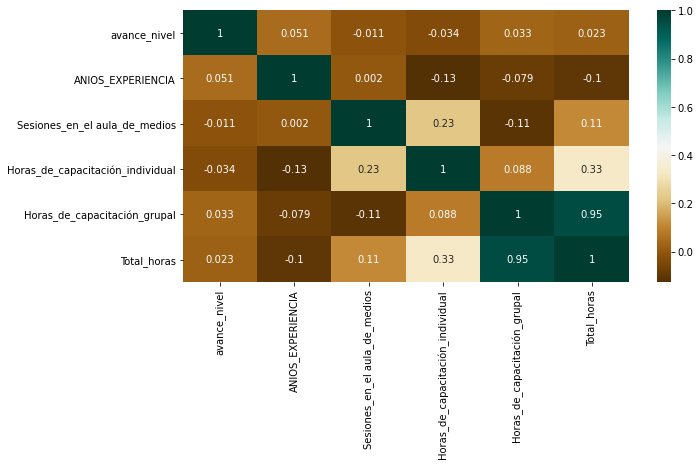

In [6]:
df1=df[['avance_nivel', 'ANIOS_EXPERIENCIA', 'Sesiones_en_el aula_de_medios', 'Horas_de_capacitación_individual', 'Horas_de_capacitación_grupal' , 'Total_horas'  ]]  

# Mapa de calor 
plt.figure(figsize=(10,5))
c= df1.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c


## Particionamiento de datos de entrada 

In [7]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=df[[ 'ANIOS_EXPERIENCIA', 'Sesiones_en_el aula_de_medios', 'Horas_de_capacitación_individual', 'Horas_de_capacitación_grupal' , 'EDAD'   ]]  
y=df['avance_nivel_grado']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 70% training and 30% test


In [8]:
df

,Unnamed: 0,userID,avance_nivel_grado,avance_nivel,Nivel de Dominio,Momento,AVANCE,email,NOMBRE_COMPLETO,CURP,...,F,G,H,I,J,total_items_relaciones,Sesiones_en_el aula_de_medios,Horas_de_capacitación_individual,Horas_de_capacitación_grupal,Total_horas
0,0,4062.0,Avance,3,3. Integrador,pre,AVANCE,letyprza@gmail.com,LETICIA BEATRIZ PEREZ AVILES,PEAL931219MYNRVT02,...,4,2,7,6,0,78,2,2,29,33
1,1,4064.0,Avance,1,2. Explorador,pre,AVANCE,guilleglezc@hotmail.com,GUILLERMINA GONZALEZ CERVANTES,GOCG780815MYNNRL01,...,2,1,3,4,0,45,0,0,19,19
2,2,4078.0,Avance,1,2. Explorador,pre,AVANCE,sky_yazmin@hotmail.com,VIOLETA YAZMÍN CETINA FUENTES,CEFV760415MYNTNL07,...,6,3,6,4,0,68,0,0,27,27
3,3,4082.0,Avance,2,3. Integrador,pre,AVANCE,alexsoberanis1@hotmail.com,EDWIN ALEXANDER ÁVILA SOBERANÍS,AISE810321HYNVBD01,...,2,1,7,4,0,63,0,0,25,25
4,4,4098.0,Avance,1,2. Explorador,pre,AVANCE,marisolgervacio@gmail.com,MARISOL GERVACIO ARROYO,GEAM860310MJCRRR04,...,6,3,0,0,0,19,0,0,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,826,3938.0,Estancado,0,2. Explorador,pre,ESTANCADO,riktoy_98@hotmail.com,RICARDO CHAVEZ LOPEZ,CALR830429HBSHPC00,...,10,5,8,0,0,92,7,13,58,78
755,827,3871.0,Avance,1,3. Integrador,pre,ESTANCADO,cruz_mp@hotmail.com,PAULINO CRUZ MARTINEZ,CUMP781201HVZRRL09,...,10,7,5,3,1,68,1,0,20,21
756,828,3841.0,Avance,2,2. Explorador,pre,AVANCE,a3u_1977@hotmail.com,AZUCENA VALLE CARRILLO,VXCA770401MBCLRZ02,...,2,1,6,2,0,66,0,1,23,24
757,829,3566.0,Estancado,0,2. Explorador,pre,ESTANCADO,silvia.edit@hotmail.com,SILVIA EDIT PEÑA CASTILLO,PECS670119MDFXSL04,...,2,1,5,0,0,51,0,1,89,90


In [9]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test) # Y predicted values 

In [10]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6644736842105263


## Probando el modelo clasificador de bosque aleatorio

Un docente con ciertas características de horas dedicadas, ¿Cuánto avance tendría?

## Determinando variables más importantes

In [11]:
for column_headers in X.columns: 
    print(column_headers)
    
column_names = X.keys().values.tolist()

ANIOS_EXPERIENCIA
Sesiones_en_el aula_de_medios
Horas_de_capacitación_individual
Horas_de_capacitación_grupal
EDAD


In [12]:

feature_imp = pd.Series(clf.feature_importances_,index= column_names  ).sort_values(ascending=False)
feature_imp

Horas_de_capacitación_grupal        0.283953
EDAD                                0.281696
ANIOS_EXPERIENCIA                   0.233231
Horas_de_capacitación_individual    0.115999
Sesiones_en_el aula_de_medios       0.085121
dtype: float64

No handles with labels found to put in legend.


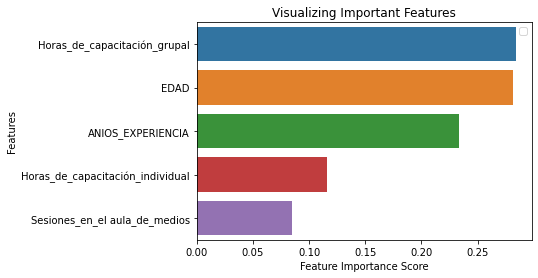

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# Relación de la edad con el avance

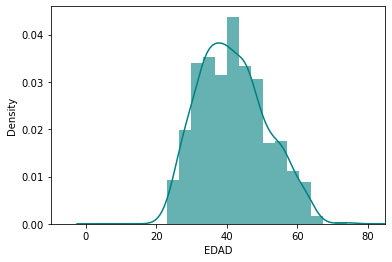

In [14]:
ax = df["EDAD"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df["EDAD"].plot(kind='density', color='teal')
ax.set(xlabel='EDAD')
plt.xlim(-10,85)
plt.show()

In [15]:
!pip install pandas-profiling

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a98f32a6-d618-48fd-8cb6-8ba1a5e89244' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

SyntaxError: invalid syntax (<ipython-input-16-1fc174960540>, line 1)